# Importing Libraries/Databases

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\kenwh'

In [3]:
path

'C:\\Users\\kenwh'

In [4]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path,'Instacart Basket Anaylsis', '02 Data', 'Prepared Data', 'ords_prod_merge_new.pkl'))

<Axes: xlabel='orders_day_of_week'>

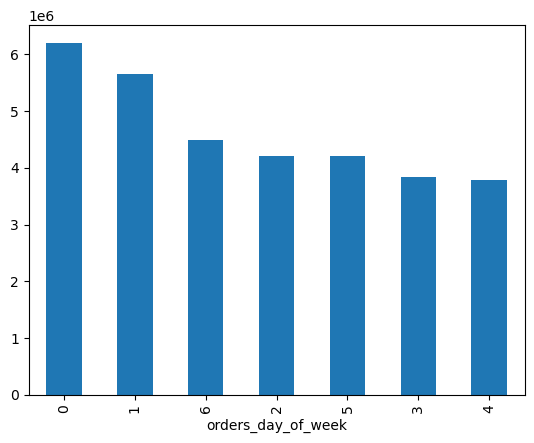

In [5]:
#create a bar chart
df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

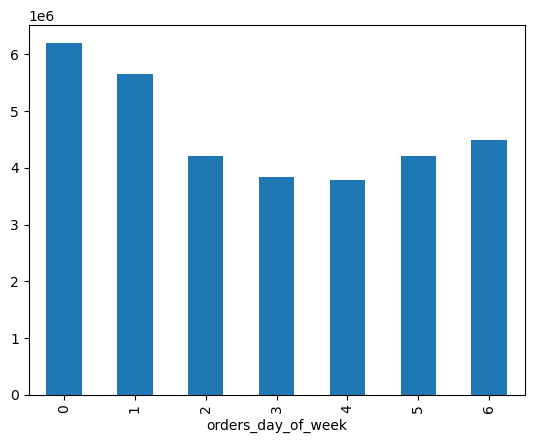

In [6]:
df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

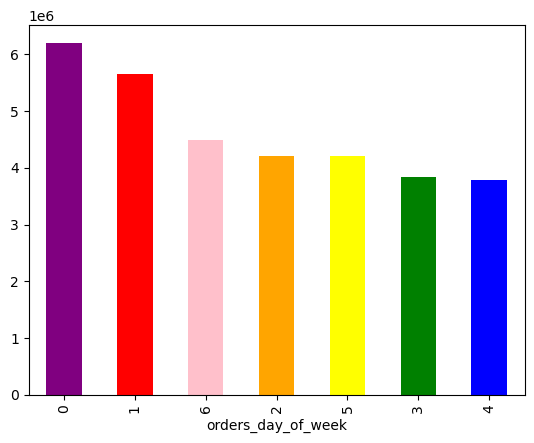

In [8]:
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [9]:
#Save file to acces
bar.figure.savefig(os.path.join(path, 'Instacart Basket Anaylsis', '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Histograms

<Axes: ylabel='Frequency'>

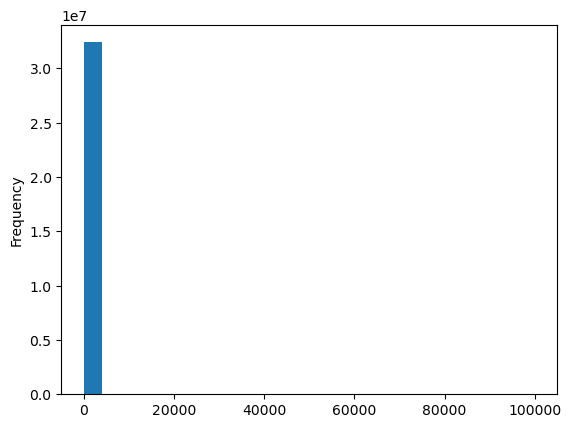

In [10]:
df_ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

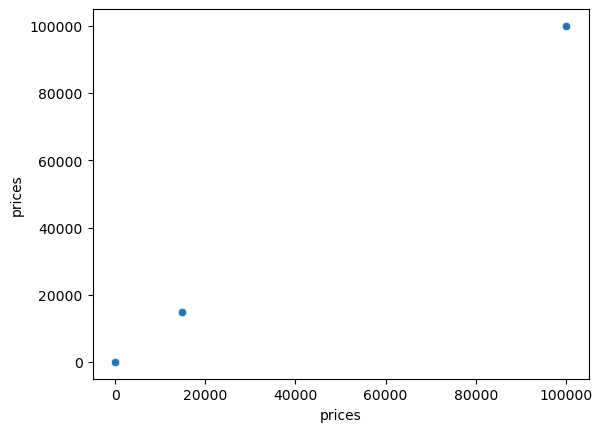

In [12]:
#something did nto work (expected in course) so try a scarterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

In [15]:
#Finding and fixing data
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,price_range_loc,busiest_day,busiest_days,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency
10030345,912404,17,12,2,Most orders,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Regularly busy,40,Regular customer,108.648299,High spender,5.0,Frequent_customer
10030346,603376,17,22,6,Most orders,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Regularly busy,40,Regular customer,108.648299,High spender,5.0,Frequent_customer
10030347,3264360,135,2,2,Average orders,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Regularly busy,4,New customer,1154.792308,High spender,11.5,nan
10030348,892534,135,3,0,Average orders,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Busiest days,Busiest days,4,New customer,1154.792308,High spender,11.5,nan
10030349,229704,342,8,1,Average orders,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Busiest days,Busiest days,16,Regular customer,114.426619,High spender,20.0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29167287,2249946,204099,29,0,Average orders,4.0,33664,1,0,2 % Reduced Fat Milk,...,both,High-range product,Busiest days,Busiest days,39,Regular customer,1106.743956,High spender,4.0,Frequent_customer
29167288,2363282,204099,31,0,Most orders,2.0,33664,1,1,2 % Reduced Fat Milk,...,both,High-range product,Busiest days,Busiest days,39,Regular customer,1106.743956,High spender,4.0,Frequent_customer
29167289,3181945,204395,13,3,Most orders,8.0,33664,25,0,2 % Reduced Fat Milk,...,both,High-range product,Slowest days,Slowest days,15,Regular customer,451.153540,High spender,4.0,Frequent_customer
29167290,2486215,205227,7,3,Average orders,4.0,33664,8,0,2 % Reduced Fat Milk,...,both,High-range product,Slowest days,Slowest days,12,Regular customer,1178.381871,High spender,7.0,Frequent_customer


In [16]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [17]:
df_ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

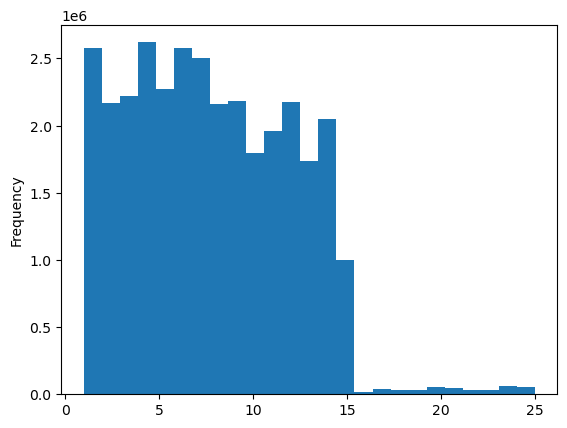

In [18]:
# try a histogram again
df_ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

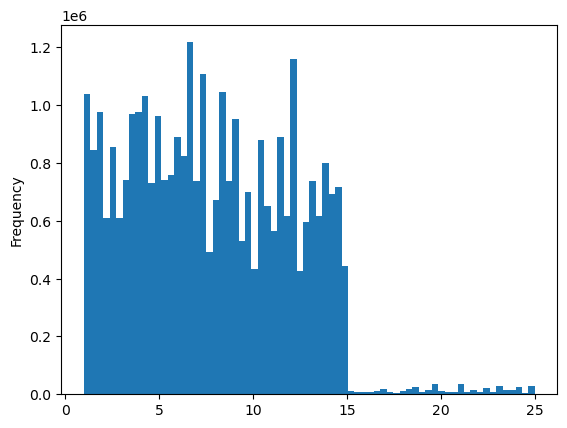

In [19]:
df_ords_prods_merge['prices'].plot.hist(bins = 70)

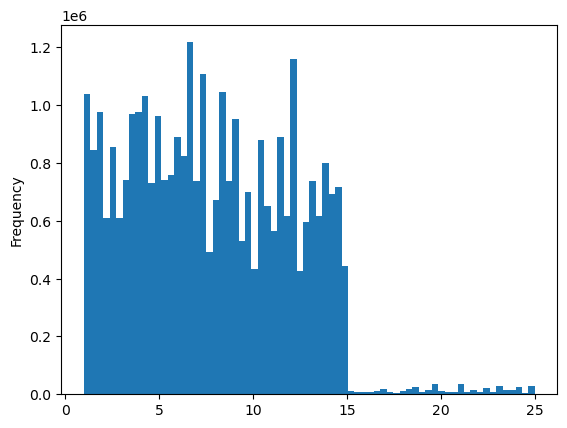

In [20]:
hist = df_ords_prods_merge['prices'].plot.hist(bins = 70)

In [22]:
bar.figure.savefig(os.path.join(path, 'Instacart Basket Anaylsis', '04 Analysis','Visualizations', 'hist_example.png'))

#Sampling

In [24]:
# setting random seed
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [25]:
np.random.rand(10)

array([0.14652875, 0.19185561, 0.99657905, 0.59139971, 0.45592832,
       0.56184089, 0.40007843, 0.31079573, 0.35588093, 0.63298758])

In [27]:
#store 70% in database "bog"
big = df_ords_prods_merge[dev]


In [28]:
#store 30% in database "small"
small = df_ords_prods_merge[~dev]

In [29]:
#Double check size of databases
len(df_ords_prods_merge)

32406041

In [30]:
len(big) + len(small)

32406041

In [31]:
df_2 = small[['orders_day_of_week','prices']]

C:\Users\kenwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kenwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


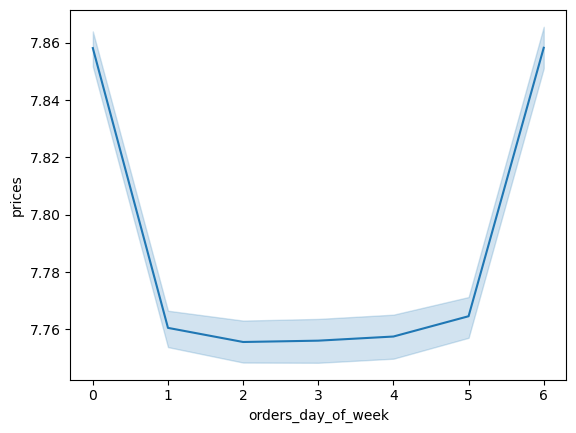

In [32]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')